In [1]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

In [2]:
train_df = pd.read_csv('train.csv/train.csv', index_col=0)
test_df = pd.read_csv('test.csv/test.csv', index_col=0)
train_preprocessed_df = pd.read_csv('train.csv/train.csv', index_col=0)
test_preprocessed_df = pd.read_csv('test.csv/test.csv', index_col=0)

train_preprocessed_df['label']

0        2
1        1
2        1
3        1
4        1
        ..
80171    3
80172    0
80173    0
80174    0
80175    0
Name: label, Length: 80176, dtype: int64

In [3]:
#print(train_df['tld'].value_counts().to_string())
tlds = pd.read_csv("https://gist.githubusercontent.com/derlin/421d2bb55018a1538271227ff6b1299d/raw/3a131d47ca322a1d001f1f79333d924672194f36/country-codes-tlds.csv", encoding='utf8')
tlds = tlds[' tld']
tlds = [item[2:] for item in tlds.unique()]
original_tlds = ['com', 'net', 'org', 'edu', 'gov']
print(tlds)

train_preprocessed_df['tld'] = train_preprocessed_df['tld'].astype(str)

train_preprocessed_df['tld'] = train_preprocessed_df.apply(lambda row: ".".join(([str(row['org'])] if str(row['org']) else []) + row['tld'].lower().split(".")), axis=1)

train_preprocessed_df['is_country_tld'] = train_preprocessed_df.apply(lambda row: any(item in tlds for item in row['tld'].lower().split(".")), axis=1)
train_preprocessed_df['tld_orig_type'] = train_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem in original_tlds]), axis=1)
train_preprocessed_df['num_domains'] = train_preprocessed_df.apply(lambda row: len(row['tld'].split(".")), axis=1)
train_preprocessed_df['tld_orig_type'].fillna('None', inplace=True)


test_preprocessed_df['tld'] = test_preprocessed_df['tld'].astype(str)

test_preprocessed_df['tld'] = test_preprocessed_df.apply(lambda row: ".".join(([str(row['org'])] if str(row['org']) else []) + row['tld'].lower().split(".")), axis=1)

test_preprocessed_df['is_country_tld'] = test_preprocessed_df.apply(lambda row: any(item in tlds for item in row['tld'].lower().split(".")), axis=1)
test_preprocessed_df['tld_orig_type'] = test_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem in original_tlds]), axis=1)
test_preprocessed_df['num_domains'] = test_preprocessed_df.apply(lambda row: len(row['tld'].split(".")), axis=1)
test_preprocessed_df['tld_orig_type'].fillna('None', inplace=True)

train_preprocessed_df['tld'] = train_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem not in tlds and elem not in original_tlds]), axis=1)

test_preprocessed_df['tld'] = test_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem not in tlds and elem not in original_tlds]), axis=1)


['af', 'ax', 'al', 'dz', 'as', 'ad', 'ao', 'ai', 'aq', 'ag', 'ar', 'am', 'aw', 'ac', 'au', 'at', 'az', 'bs', 'bh', 'bd', 'bb', 'eus', 'by', 'be', 'bz', 'bj', 'bm', 'bt', 'bo', 'bq', 'an', 'nl', 'ba', 'bw', 'bv', 'br', 'io', 'vg', 'bn', 'bg', 'bf', 'mm', 'bi', 'kh', 'cm', 'ca', 'cv', 'cat', 'ky', 'cf', 'td', 'cl', 'cn', 'cx', 'cc', 'co', 'km', 'cd', 'cg', 'ck', 'cr', 'ci', 'hr', 'cu', 'cw', 'cy', 'cz', 'dk', 'dj', 'dm', 'do', 'tl', 'tp', 'ec', 'eg', 'sv', 'gq', 'er', 'ee', 'et', 'eu', 'fk', 'fo', 'fm', 'fj', 'fi', 'fr', 'gf', 'pf', 'tf', 'ga', 'gal', 'gm', 'ps', 'ge', 'de', 'gh', 'gi', 'gr', 'gl', 'gd', 'gp', 'gu', 'gt', 'gg', 'gn', 'gw', 'gy', 'ht', 'hm', 'hn', 'hk', 'hu', 'is', 'in', 'id', 'ir', 'iq', 'ie', 'im', 'il', 'it', 'jm', 'jp', 'je', 'jo', 'kz', 'ke', 'ki', 'kw', 'kg', 'la', 'lv', 'lb', 'ls', 'lr', 'ly', 'li', 'lt', 'lu', 'mo', 'mk', 'mg', 'mw', 'my', 'mv', 'ml', 'mt', 'mh', 'mq', 'mr', 'mu', 'yt', 'mx', 'md', 'mc', 'mn', 'me', 'ms', 'ma', 'mz', 'na', 'nr', 'np', 'nc', 'nz', 

In [4]:
train_preprocessed_df.head()


,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,is_country_tld,tld_orig_type,num_domains
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,reply.ebay,0,0,multipart/alternative,35,120,0,0,49.0,80027,2,True,,3
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,edm.efinmail,0,0,multipart/alternative,1,7,0,0,107.0,2961,1,False,com,3
2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,usebackpack,0,0,text/html,4,17,0,0,35.0,25149,1,False,com,2
3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,granular,0,0,multipart/mixed,0,0,0,0,15.0,635296,1,True,,2
4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,github,1,0,multipart/alternative,2,11,0,0,49.0,2355,1,False,com,2


In [5]:
train_x = train_preprocessed_df[['mail_type']]
train_y = train_preprocessed_df[['label']]

test_x = test_preprocessed_df[['mail_type']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_x, test_x]))
train_tld_x_featurized = feat_enc2.transform(train_x)
test_tld_x_featurized = feat_enc2.transform(test_x)

train_preprocessed_df['mail_type'] = train_tld_x_featurized
test_preprocessed_df['mail_type'] = test_tld_x_featurized

train_x = train_preprocessed_df[['tld_orig_type']]
test_x = test_preprocessed_df[['tld_orig_type']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_x, test_x]))
train_tld_x_featurized = feat_enc2.transform(train_x)
test_tld_x_featurized = feat_enc2.transform(test_x)

train_preprocessed_df['tld_orig_type'] = train_tld_x_featurized
test_preprocessed_df['tld_orig_type'] = test_tld_x_featurized

train_tld_x = train_preprocessed_df[['org']]
test_tld_x = test_preprocessed_df[['org']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc2.transform(train_tld_x)
test_tld_x_featurized = feat_enc2.transform(test_tld_x)

train_preprocessed_df['org'] = train_tld_x_featurized
test_preprocessed_df['org'] = test_tld_x_featurized

train_tld_x = train_preprocessed_df[['tld']]
test_tld_x = test_preprocessed_df[['tld']]

feat_enc3 = LabelEncoder()
feat_enc3.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc3.transform(train_tld_x)
test_tld_x_featurized = feat_enc3.transform(test_tld_x)

train_preprocessed_df['tld'] = train_tld_x_featurized
test_preprocessed_df['tld'] = test_tld_x_featurized

c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

In [6]:
# Parse dates and put in unix format

from dateutil import parser
from datetime import datetime
import time

def to_unix(date):
  return int(time.mktime(date.timetuple()))

def strip_formatting(date_string):
  first_paren = date_string.find(" (")
  if first_paren != -1:
    return date_string[:first_paren]
  return date_string

def string_to_unix(date_string):
  date_time = parser.parse(strip_formatting(date_string))
  return to_unix(date_time)

def datetime_obj(date_string):
  unix_time = string_to_unix(date_string)
  return datetime.fromtimestamp(unix_time)

def has_weekday(date_string):
  return date_string[0].isalpha()

def has_parentheses(date_string):
  return date_string.find("(") != -1

# train_df['date'][382] has parentheses
# train_df['date][924] has no weekday

# add new columns to data
train_preprocessed_df['date_has_weekday'] = train_preprocessed_df.apply(lambda row: has_weekday(row['date']), axis=1)
train_preprocessed_df['date_has_parentheses'] = train_preprocessed_df.apply(lambda row: has_parentheses(row['date']), axis=1)
test_preprocessed_df['date_has_weekday'] = test_preprocessed_df.apply(lambda row: has_weekday(row['date']), axis=1)
test_preprocessed_df['date_has_parentheses'] = test_preprocessed_df.apply(lambda row: has_parentheses(row['date']), axis=1)
# make date unix style
train_preprocessed_df['date'] = train_preprocessed_df.apply(lambda row: pd.Period(datetime_obj(row['date']), freq='H').day_of_year, axis=1)
test_preprocessed_df['date'] = test_preprocessed_df.apply(lambda row: pd.Period(datetime_obj(row['date']), freq='H').day_of_year, axis=1)




In [ ]:
cols = ['date',
 'ccs',
 'bcced',
 'images',
 'urls',
 'salutations',
 'designation',
 'chars_in_subject',
 'chars_in_body',
 'num_domains']
for col in cols:
    print(col)
    max_train = max(train_preprocessed_df[col])
    max_test = max(test_preprocessed_df[col])
    max_val = max(max_train, max_test)
    train_preprocessed_df[col] = train_preprocessed_df.apply(lambda row: float(row[col])/max_val, axis=1)
    test_df[col] = test_preprocessed_df.apply(lambda row: float(row[col])/max_val, axis=1)

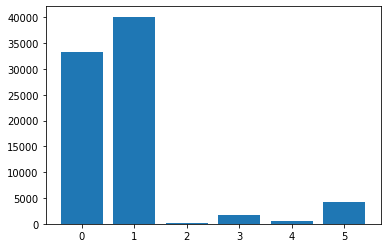

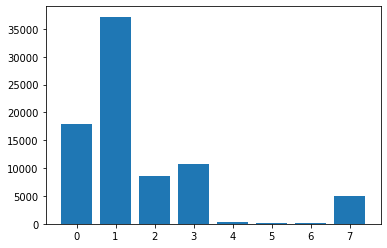

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,is_country_tld,tld_orig_type,num_domains,date_has_weekday,date_has_parentheses
0,310,803,904,0,0,4,35,120,0,0,49.0,80027,2,True,0,3,True,False
1,45,317,337,0,0,4,1,7,0,0,107.0,2961,1,False,1,3,True,False
2,188,1001,1106,0,0,11,4,17,0,0,35.0,25149,1,False,1,2,True,False
3,284,440,491,0,0,5,0,0,0,0,15.0,635296,1,True,0,2,True,False
4,311,421,470,1,0,4,2,11,0,0,49.0,2355,1,False,1,2,True,True


In [7]:
counter = Counter(train_preprocessed_df['tld_orig_type'])
plt.bar(counter.keys(), counter.values())
plt.show()

counter = Counter(train_preprocessed_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()

train_preprocessed_df.head()

In [8]:
from sklearn.impute import KNNImputer

removed_columns = ['label']
input_cols = [x for x in train_preprocessed_df.columns.values.tolist() if x not in removed_columns]

imputer = KNNImputer(n_neighbors=2, weights='distance')
imputer.fit(train_preprocessed_df[input_cols])
train_preprocessed_df[input_cols] = imputer.transform(train_preprocessed_df[input_cols])
test_preprocessed_df[input_cols] = imputer.transform(test_preprocessed_df[input_cols])
print(train_preprocessed_df.head())
print(test_preprocessed_df.head())
train_preprocessed_df.head()

    date     org     tld  ccs  bcced  mail_type  images   urls  salutations  \
0  310.0   803.0   904.0  0.0    0.0        4.0    35.0  120.0          0.0   
1   45.0   317.0   337.0  0.0    0.0        4.0     1.0    7.0          0.0   
2  188.0  1001.0  1106.0  0.0    0.0       11.0     4.0   17.0          0.0   
3  284.0   440.0   491.0  0.0    0.0        5.0     0.0    0.0          0.0   
4  311.0   421.0   470.0  1.0    0.0        4.0     2.0   11.0          0.0   

   designation  chars_in_subject  chars_in_body  label  is_country_tld  \
0          0.0              49.0        80027.0      2             1.0   
1          0.0             107.0         2961.0      1             0.0   
2          0.0              35.0        25149.0      1             0.0   
3          0.0              15.0       635296.0      1             1.0   
4          0.0              49.0         2355.0      1             0.0   

   tld_orig_type  num_domains  date_has_weekday  date_has_parentheses  
0       

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,is_country_tld,tld_orig_type,num_domains,date_has_weekday,date_has_parentheses
0,310.0,803.0,904.0,0.0,0.0,4.0,35.0,120.0,0.0,0.0,49.0,80027.0,2,1.0,0.0,3.0,1.0,0.0
1,45.0,317.0,337.0,0.0,0.0,4.0,1.0,7.0,0.0,0.0,107.0,2961.0,1,0.0,1.0,3.0,1.0,0.0
2,188.0,1001.0,1106.0,0.0,0.0,11.0,4.0,17.0,0.0,0.0,35.0,25149.0,1,0.0,1.0,2.0,1.0,0.0
3,284.0,440.0,491.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,15.0,635296.0,1,1.0,0.0,2.0,1.0,0.0
4,311.0,421.0,470.0,1.0,0.0,4.0,2.0,11.0,0.0,0.0,49.0,2355.0,1,0.0,1.0,2.0,1.0,1.0


In [9]:
from math import ceil
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
# These columns will be used as the inputs of the models

print(input_cols)
# The output columns are the genres
output_col = 'label'

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body', 'is_country_tld', 'tld_orig_type', 'num_domains', 'date_has_weekday', 'date_has_parentheses']


In [36]:
final_train_df = train_preprocessed_df.copy()
test_final_df = test_preprocessed_df.copy()

final_train_labels = final_train_df.pop('label')

In [37]:
from imblearn.combine import SMOTETomek

oversample = SMOTETomek()
final_train_features, final_train_labels = oversample.fit_resample(final_train_df, final_train_labels)

In [38]:
clf = RandomForestClassifier(class_weight={0:45, 1:100, 2:20, 3:25, 4:2, 5:1, 6:1, 7:15}, n_estimators=28, max_features=7, max_depth=14, criterion='entropy')
clf.fit(final_train_features, final_train_labels)
pred_y = clf.predict(test_final_df)

pred_df = pd.DataFrame(pred_y, columns=['label'])
pred_df.to_csv("oversample_weights_randomforest.csv", index=True, index_label='Id')

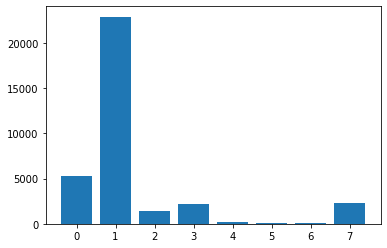

In [39]:

counter = Counter(pred_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()

In [40]:
final_train_features

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,is_country_tld,tld_orig_type,num_domains,date_has_weekday,date_has_parentheses
0,310.000000,803.000000,904.000000,0.0,0.0,4.0,35.000000,120.000000,0.000000,0.000000,49.000000,80027.000000,1.0,0.0,3.0,1.0,0.000000
1,45.000000,317.000000,337.000000,0.0,0.0,4.0,1.000000,7.000000,0.000000,0.000000,107.000000,2961.000000,0.0,1.0,3.0,1.0,0.000000
2,188.000000,1001.000000,1106.000000,0.0,0.0,11.0,4.000000,17.000000,0.000000,0.000000,35.000000,25149.000000,0.0,1.0,2.0,1.0,0.000000
3,284.000000,440.000000,491.000000,0.0,0.0,5.0,0.000000,0.000000,0.000000,0.000000,15.000000,635296.000000,1.0,0.0,2.0,1.0,0.000000
4,311.000000,421.000000,470.000000,1.0,0.0,4.0,2.000000,11.000000,0.000000,0.000000,49.000000,2355.000000,0.0,1.0,2.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293939,111.384547,570.000000,629.000000,0.0,0.0,4.0,14.983516,73.590663,0.000000,1.000000,85.848874,70556.832389,0.0,1.0,2.0,1.0,1.000000
293940,237.415718,1065.000000,1172.000000,0.0,0.0,4.0,19.581461,74.581461,0.000000,0.193820,95.797750,54985.463476,0.0,1.0,2.0,1.0,0.000000
293941,172.930825,775.000000,876.000000,0.0,0.0,4.0,13.231447,109.083019,0.768553,0.768553,119.139621,103901.044029,0.0,1.0,2.0,1.0,0.231447
293942,106.168722,670.927818,750.605712,0.0,0.0,4.0,9.523008,94.415639,0.492331,0.507669,75.386465,84714.493834,0.0,1.0,2.0,1.0,1.000000
